## OBJECTIVE: To Predict the sales price of a product based on investment in three different media channels                   

## Step 1. import Dependencies

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## Step 2. Reading the data

In [34]:
# reading the csv pandassv
df = pd.read_csv("Advertising.csv" , index_col=0)
print(df.shape)
df.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [35]:
try:
    pd.read_csv("mdhd8bfnd")
except:
    print("File not found")

File not found


## Step 3.Data Analysis

In [39]:
print(df.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [41]:
print(df.shape)

(200, 4)


In [43]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- In this data we can see that we have spend the more amount on tv media channel
- less amount on radio media chennel

## Step 4. Check Assumption

- Linear Regression is A Parametric algorithm means before using Linear Regression we have to check few assumptions if those assumptions are true then only we can use Linear Regrdession , other wise use other algo.

### Assumption 1. There should- Be No Outliers in The Data

<Axes: >

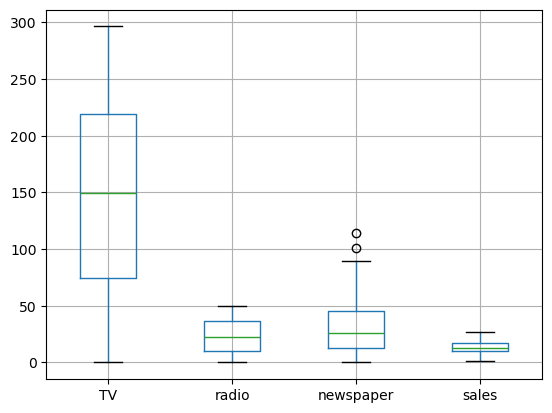

In [49]:
df.boxplot() # we box plot only for continuous numeric data

* In data frame we have all the variables in continuous numeric value so we create box plot on all columns by this plot we can see there is no outliers in tv ,radio and newspaper contains two outliers.

<Axes: >

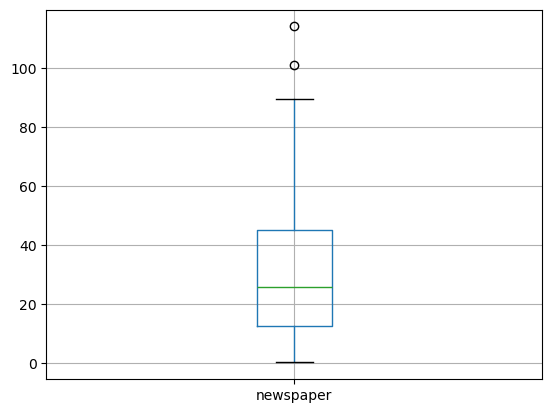

In [51]:
df.boxplot(column="newspaper")

<b> Note :If outlier present than we can treat using below approach 
   1. Elimination 
       A. Directly dropping the values
   2. Treating the outliers
       A. Using Capping and- Floaring approach
       B. Replace Using Measure of Central of Tendencies
       C. Replace custom values
   3. Of cluster is present then leave them as it is 
   4. Check with Client if this is acceptable range or not

## Check missing values

In [54]:
def check_missing_value(data):
    """
    Objective :Check missing values count and percentage in all columns 

    data: input data frame 
    retun: Missing value data frame
    """
    total = data.isnull().sum().sort_values(ascending = True)
    percentage = (data.isnull().sum()/data.isnull().count()  *100).sort_values(ascending =False)
    missing_data= pd.concat([total,percent],axis =1 , keys=["Total","Percent"] )
    return missing_value

In [55]:
miss = check_missing_value(df)
miss

NameError: name 'percent' is not defined

Note:

    1. If Missing value contain more than 50% of the data then you can drop the entire column
    2. If less than 50%then we can treat those missing values by using Measures of Center tendency
    3. If column is categorical then you can use Mode to replace missing values
    4. If column is continuous Numerical variable then you can use Mean if that variable is not skewed
     5. if column is continuous numerical variable with skewed then we cam use Median which is not affected by the outlier
    6. You can predict the missing values by using other features (not recommended)
    7. You can direcly ask to client
    8. Common sence

### Assumption 2: Assumption of Linearity : Every Independendt variable should have Linear Relationship with the dependent variables 

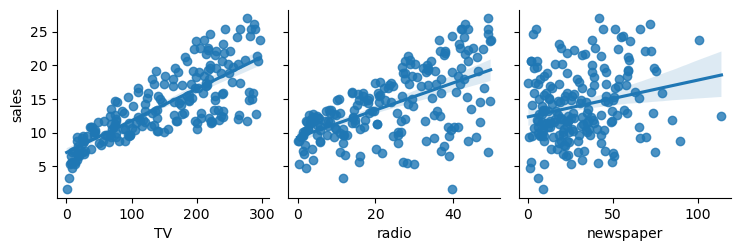

In [63]:
sns.pairplot(df,
            x_vars=["TV","radio","newspaper"],
            y_vars="sales",
            kind="reg")

plt.show()

### NOTE : if the assumption of Linearity is not met we can drop that variable

- Strong Positive Linear Relationship in TV and- Sales
- Moderately Strong Positive Linear Relationship in Radio and Sales
- No Relation in Newspaper Sales also the C.I is also high

In [64]:
#print all column names(we can observe if any space is presendt in columns name)
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [65]:
feature_cols =["TV","radio","newspaper"]
X= df[feature_cols]
y = df.sales

In [66]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [67]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

## Assumption 3: Assumption  of Normality : The dependet Variable should- follow an approximate normal distribution

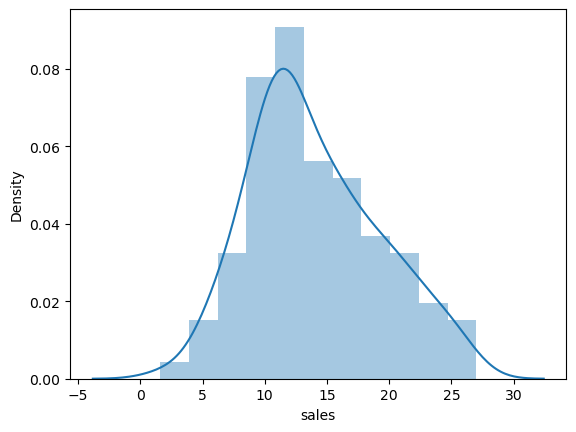

In [69]:
sns.distplot(y, hist= True)
plt.show()

#### NOte : if its not a normalor if its skewed plot then we can transform the column in different transformation

<Axes: xlabel='sales', ylabel='Density'>

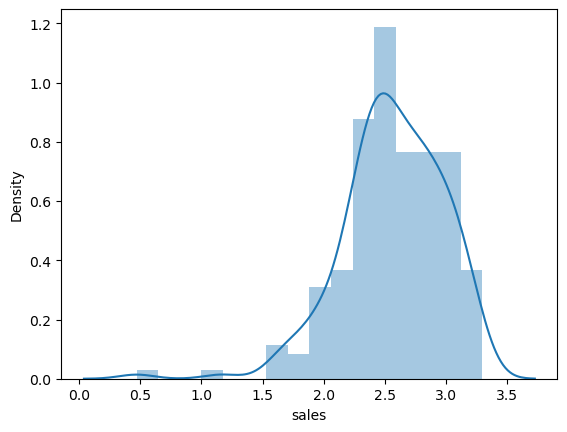

In [75]:
#you can use this cod-e to convert into log transformation
Y_log= np.log(y)
sns.distplot(Y_log, hist = True)

#### Note : If d-ata is approximate normal than don't transform coz you willget skewed data 

#### Note: For good practice make sure that your X variables d-oes not contain High skeweness and 
#### if its approximately normal then its good.

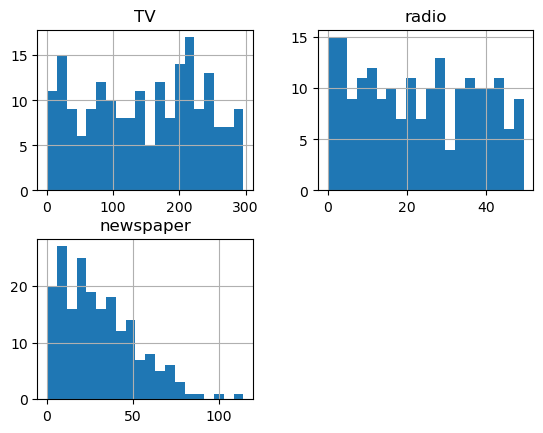

In [77]:
#check hist for all variables
X.hist(bins= 20)
plt.show()

In [78]:
data_new_skew= X.apply(lambda x:skew(x.dropna()))
data_new_skewed = data_new_skew[(data_new_skew >0.75) |(data_new_skew< -0.75)]

print(data_new_skew)
print(data_new_skewed)

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [79]:
X[data_new_skewed.index]

,newspaper
1,69.2
2,45.1
3,69.3
4,58.5
5,58.4
...,...
196,13.8
197,8.1
198,6.4
199,66.2


In [80]:
# apply log+1 transformation for all numeric feature with Skewness over 0.75
X[data_new_skewed.index] = np.log1p(X[data_new_skewed.index])

In [96]:
X[data_new_skewed.index]

,newspaper
1,4.251348
2,3.830813
3,4.252772
4,4.085976
5,4.084294
...,...
196,2.694627
197,2.208274
198,2.001480
199,4.207673


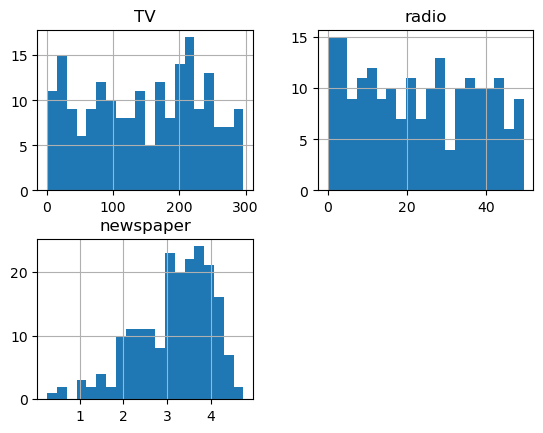

In [98]:
# check hist for all variables after log transform of newspaper 
X.hist(bins=20)
plt.show()

## Assumption 4. There should be No multicollinearity in the Data

### Pearson Correlation

In [102]:
corr_df = X.corr(method ="pearson")
print(corr_df)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


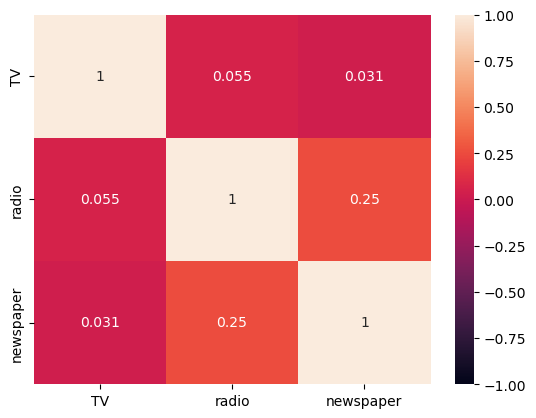

In [103]:
sns.heatmap(corr_df,vmax =1.0 ,vmin=-1.0 ,annot = True)
plt.show()

We want value close to 0 means that is not correlated with each other

NOTE: If the       

### CHECK THE VIF
sometimes the correlation matrix alone willl not help you to check the multicolinearity so you can use VIF

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] =X.columns
vif_df["VIF Factors"] =[vif(X.values,i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factors
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


### OR

In [110]:
all_scores=[]

for i in range(X.shape[1]):
    v= vif(X.values,i)
    all_scores.append(round(v,2))
vif_df["VIF Factors"]= all_scores

vif_df.round(2)

,features,VIF Factors
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [111]:
X.shape

(200, 3)

In [113]:
#df.drop("newspaper")

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
## here random_state is used to make sure that all will get the same data in test or train

# > 1000 ---> TEST SIZE =0.3
#< 1000---> TEST SIZE =0.2

#split the data into test and train
X_train, X_test, y_train,y_test =train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state= 10)

In [117]:
df.shape

(200, 4)

In [119]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler= MinMaxScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale= scaler.transform(X_test)

In [121]:
X_train

,TV,radio,newspaper
191,39.5,41.1,1.916923
8,120.2,19.6,2.533697
27,142.9,29.3,2.610070
139,43.0,25.9,3.068053
59,210.8,49.6,3.655840
...,...,...,...
114,209.6,20.6,2.459589
65,131.1,42.8,3.397858
16,195.4,47.7,3.987130
126,87.2,11.8,3.292126


In [123]:
X_test_scale

array([[ 0.70680807,  0.59229209,  0.46173972],
       [ 0.01573726,  0.98580122,  0.90759788],
       [ 0.73315087,  0.55578093,  0.83300465],
       [ 0.95620937,  0.84584178,  0.88014484],
       [ 0.72630859,  0.83975659,  0.76773044],
       [ 0.48990763,  0.47870183,  0.61088993],
       [ 0.63051659,  0.36105477,  0.67339682],
       [ 0.66643859,  0.9959432 ,  0.85855021],
       [ 0.72767704,  0.88438134,  0.68642747],
       [ 0.04481697,  0.92494929,  0.89020572],
       [ 0.97707834,  0.85192698,  0.82379528],
       [ 0.21211085,  0.11156187,  0.66133516],
       [ 0.04379063,  0.88032454,  0.94630581],
       [ 0.74033527,  0.6673428 ,  0.75818818],
       [ 0.77112556,  0.64908722,  0.90523715],
       [ 0.33732467,  0.59432049,  0.44134199],
       [ 0.85973315,  0.53955375,  0.35904374],
       [ 0.00444749,  0.60040568,  0.46389516],
       [ 0.8128635 ,  0.76470588,  0.65230209],
       [ 0.68730756,  0.90872211,  0.61637144],
       [ 0.62846391,  0.42190669,  0.466

## Model Building

In [125]:
from sklearn.linear_model import LinearRegression

#create a model object
lm=LinearRegression()

# train the model object
lm.fit(X_train_scale, y_train)

LinearRegression()

In [126]:
#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.577703676256256
[12.78593321  9.51672799 -0.21942783]


In [127]:
#pair the feature names with the coefficeints
print(list(zip(feature_cols,lm.coef_)))

[('TV', 12.785933211080344), ('radio', 9.516727993391221), ('newspaper', -0.21942783008785405)]


In [128]:
# try changing the value of X (for example using formula)
600
X1=200 # tv
X2=200# radio
X3=200# newspaper

y_pred_single_data =3.5963760844147785 +(12.782407911332024 * X1)+(9.505331299323426 *X2)+ (-0.19952400762248823* X3)
print(y_pred_single_data)

4421.239416691007


In [129]:
X_test

,TV,radio,newspaper
60,210.7,29.5,2.332144
6,8.7,48.9,4.330733
21,218.4,27.7,3.996364
199,283.6,42.0,4.207673
53,216.4,41.7,3.703768
20,147.3,23.9,3.000720
163,188.4,18.1,3.280911
56,198.9,49.4,4.110874
70,216.8,43.9,3.339322
3,17.2,45.9,4.252772


In [130]:
X_test_scale

array([[ 0.70680807,  0.59229209,  0.46173972],
       [ 0.01573726,  0.98580122,  0.90759788],
       [ 0.73315087,  0.55578093,  0.83300465],
       [ 0.95620937,  0.84584178,  0.88014484],
       [ 0.72630859,  0.83975659,  0.76773044],
       [ 0.48990763,  0.47870183,  0.61088993],
       [ 0.63051659,  0.36105477,  0.67339682],
       [ 0.66643859,  0.9959432 ,  0.85855021],
       [ 0.72767704,  0.88438134,  0.68642747],
       [ 0.04481697,  0.92494929,  0.89020572],
       [ 0.97707834,  0.85192698,  0.82379528],
       [ 0.21211085,  0.11156187,  0.66133516],
       [ 0.04379063,  0.88032454,  0.94630581],
       [ 0.74033527,  0.6673428 ,  0.75818818],
       [ 0.77112556,  0.64908722,  0.90523715],
       [ 0.33732467,  0.59432049,  0.44134199],
       [ 0.85973315,  0.53955375,  0.35904374],
       [ 0.00444749,  0.60040568,  0.46389516],
       [ 0.8128635 ,  0.76470588,  0.65230209],
       [ 0.68730756,  0.90872211,  0.61637144],
       [ 0.62846391,  0.42190669,  0.466

In [131]:
y_pred=lm.predict(X_test_scale)
print(y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


## Evolution

In [133]:
new_df = pd.DataFrame()
new_df= X_test

new_df["Actual Sales"] =y_test
new_df["Predicted Sales"] =y_pred
new_df["Error"] = abs(new_df["Actual Sales"] - new_df["Predicted Sales"])
new_df

,TV,radio,newspaper,Actual Sales,Predicted Sales,Error
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,5.761369
21,218.4,27.7,3.996364,18.0,18.058153,0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490
20,147.3,23.9,3.000720,14.6,14.263259,0.336741
163,188.4,18.1,3.280911,14.9,14.927745,0.027745
56,198.9,49.4,4.110874,23.7,21.388474,2.311526
70,216.8,43.9,3.339322,22.3,21.147529,1.152471
3,17.2,45.9,4.252772,9.3,12.757885,3.457885


In [134]:
from sklearn.metrics import  r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test ,y_pred)
print("R Square :" , r2)

adjusted_r_squared =1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R square :" , adjusted_r_squared)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE :" ,rmse)


R Square : 0.8348010719035319
Adjusted R square : 0.8322725168816472
RMSE : 2.5929769110930603


## Ridge Regression

In [136]:
# from sklearn.model_selection import train_test_split

#split the data into test and train
#X_train, X_test, y_train,y_test =train_test_split(X,
 #                                                y,
  #                                               test_size=0.2,
   #                                              random_state= 10)

In [137]:
from sklearn.linear_model import Ridge

In [138]:
lm_ridge= Ridge(alpha=1.0)
lm_ridge.fit(X_train_scale,y_train)

#print intercept and coefficient for Ridge regression
print(lm_ridge.intercept_)
print(lm_ridge.coef_)

4.139703899924253
[11.86195582  8.88944348  0.03457977]


In [139]:
# Linear Regression coefficients
print(list(zip(feature_cols, lm_ridge.coef_)))

[('TV', 11.861955822955139), ('radio', 8.889443483025728), ('newspaper', 0.03457976558440893)]


In [140]:
# prediction using Ridge Regression
Y_pred_ridge = lm_ridge.predict(X_test_scale)


r2 = r2_score(y_test ,Y_pred_ridge)
print("R Square :" , r2)

adjusted_r_squared =1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R square :" , adjusted_r_squared)

rmse = np.sqrt(mean_squared_error(y_test,Y_pred_ridge))
print("RMSE :" ,rmse)


R Square : 0.823681823482152
Adjusted R square : 0.8209830758823891
RMSE : 2.6788202916614625


## Lasso Regression

In [142]:
from sklearn.linear_model import Lasso

In [143]:
lm_lasso= Lasso(alpha=1.0)
lm_lasso.fit(X_train_scale,y_train)

#print intercept and coefficient for Ridge regression
print(lm_lasso.intercept_)
print(lm_lasso.coef_)

13.581863904934774
[0.51689124 0.         0.        ]


In [144]:
# ridge regression coefficients
print("Linear Reg: ", list(zip(feature_cols,lm.coef_)))
print("Ridge Reg : ", list(zip(feature_cols,lm_ridge.coef_)))
print("Lasso Reg : ", list(zip(feature_cols,lm_lasso.coef_)))

Linear Reg:  [('TV', 12.785933211080344), ('radio', 9.516727993391221), ('newspaper', -0.21942783008785405)]
Ridge Reg :  [('TV', 11.861955822955139), ('radio', 8.889443483025728), ('newspaper', 0.03457976558440893)]
Lasso Reg :  [('TV', 0.5168912350044306), ('radio', 0.0), ('newspaper', 0.0)]


In [145]:
# prediction using Lasso Regression
Y_pred_Lasso =lm_Lasso.predict(X_test_scale)
r2=r2_score(y_test,Y_pred_Lasso)
print("R Square (Lasso): ", r2)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square (Lasso): ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,Y_pred_Lasso))
print("RMSE (Lasso): ", rmse)


NameError: name 'lm_Lasso' is not defined

## OLS Regression

In [ ]:
new_df = pd.DataFrame()
new_df = X_train

new_df["sales"] = Y_train
new_df.shape

In [ ]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())


### Assumption 5: There shoud be No autocorelation in the data (check using Durbin-watsaon )



correlation is the relation betweeen the varilabes autocorelation is the realtion is between the observation, so whenever you have such kind of data where your observation are interdependent on each other, then linear regression algorithym is not suitable. for eg. Time Series data like stock prediction

- output range -> 0 to 4
- close to 2, no autocorrelation
- close to 4, -ve autocorrelation
- close to 0, +ve autocorrelation 

#### Note: If autocorrelation is Present then Perfom Time Series or Other Algorithms


In [ ]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2score=r2_score(Y_test,Y_pred)
print(r2score)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared_ols = 1 - (1-r2score)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared_ols)

# Eliminating Newspaper

In [ ]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())


In [ ]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2score=r2_score(Y_test,Y_pred)
print(r2score)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared_ols = 1 - (1-r2score)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared_ols)

### Assumption 6:  Error shoud be Random (check using Residual vs Fitted)

In [ ]:
import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constatnt term for intercept)
model_fitted_y = lm_model.fittedvalues


plot_lm_1.axes[0] =sns.residplot(model_fitted_y, "sales", data=new_df, lowess=True)


plot_lm_1.axes[0].set_title("Residuals Vs Fitted")
plot_lm_1.axes[0].set_xlabel("Fitted Values")
plot_lm_1.axes[0].set_ylabel("Residuals")

plt.show()

In [ ]:
### Note: This plot does not contain any wave like pattern or repeating striaght pattern of line, this line and our line is random so error is random


# A   P   E
# 10 12   2
# 11 13   2
# 14 16   2 

### Assumption 7: Error should follow a normal distribution (check using normal quantile quantile plot)

In [ ]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats

fig = stm.qqplot(res, fit=True, line="45")
plt.title("Normal Q-Q")
plt.xlabel("Theoritical Quantiles")
plt.ylabel('Standardized Residuals')
plt.show()

### Note: if most of the data point is falling on the red line then its good case and error is normal distributed

### Assumption 8: Error should follow constatnt variance (homescadascity) and if error is not following constant varaince then its (hetroscadascity) (check using scale location plot